<a href="https://colab.research.google.com/github/BaThienPhan/AIO_Exercise_Module4/blob/feature_week3/GA_Advertising_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# aivietnam.ai - advertising
import numpy as np
# from numpy import genfromtxt
import matplotlib.pyplot as plt
import random
random.seed(0) # please do not remove this line
%matplotlib inline

def load_data_from_file(fileName = "/content/drive/MyDrive/Exercise/Module 4/week 3/advertising.csv"):
  data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
  features_X = data[:, :3]
  sales_Y = data[:, 3]
  intercept = np.ones((len(features_X), 1))
  features_X = np.concatenate((intercept, features_X), axis=1)
  #features_X = np.insert(features_X, 0, values=1, axis=1)
  #sales_Y = np.insert(sales_Y, 0, values=1, axis=0)
  return features_X, sales_Y

In [10]:
#Question 2
features_X, _ = load_data_from_file()
print(features_X[:5,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [8]:
#Question 3
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

(201,)


In [17]:
def generate_random_value(bound = 10):
    return (random.random() - 0.5)*bound

def create_individual(n=4, bound=10):

    individual = []

    for i in range(n):
        value = generate_random_value(bound)
        individual.append(value)

    return individual

In [18]:
individual = create_individual()
print(individual)

[0.1127472136860852, -0.9506586254958571, 2.837985890347726, -1.9668727392107255]


In [19]:
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss  = np.multiply((y_hat-sales_Y), (y_hat-sales_Y)).mean()
    return loss

def compute_fitness(individual):

    loss = compute_loss(individual)

    # Để tránh chia cho 0, đặt ngưỡng cho loss nhỏ nhất
    epsilon = 1e-6
    if loss < epsilon:
        fitness = 1 / epsilon
    else:
        fitness = 1 / loss  # Nghịch đảo của loss

    return fitness

In [20]:
#question 4
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0186001912541925e-06


In [23]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()


     # Thực hiện crossover dựa trên tỷ lệ crossover_rate
    if random.random() < crossover_rate:
        # Chọn ngẫu nhiên một điểm crossover
        crossover_point = random.randint(1, len(individual1) - 1)

        # Hoán đổi các phần sau điểm crossover giữa hai cá thể
        individual1_new[crossover_point:], individual2_new[crossover_point:] = (
            individual2[crossover_point:], individual1[crossover_point:])
    else:
        individual1_new = individual1
        individual2_new = individual2

    return individual1_new, individual2_new

In [24]:
#question 5
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1: ", individual1)
print("individual2: ", individual2)

individual1:  [4.09, 2.57, -0.79, -2.41]
individual2:  [3.44, 4.82, 3.1, 4.02]


In [27]:
def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()

    for i in range(len(individual_m)):
        if random.random() < mutation_rate:
            individual_m[i] = generate_random_value()

    return individual_m

In [28]:
#Question 6
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

False


In [29]:
def initializePopulation(m):
  population = [create_individual() for _ in range(m)]
  return population

In [30]:
population = initializePopulation(100)
print(len(population))

100


In [31]:
def selection(sorted_old_population, m):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if (index2 != index1):
            break

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

In [32]:
population = initializePopulation(m=100)
individual_s = selection(population, m = 100)
print(individual_s)

[0.8161618344459465, -1.0376501497190782, -3.9796827177292893, -2.473919141752867]


In [33]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen%1 == 0:
        print("Best loss:", compute_loss(sorted_population[m-1]), "with chromsome: ", sorted_population[m-1])

    new_population = []
    while len(new_population) < m-elitism:
        # selection
        individual_s = selection(sorted_population, m)
        # crossover
        individual1, individual2 = crossover(individual_s, sorted_population[random.randint(0, m-1)])
        # mutation
        individual1 = mutate(individual1)
        individual2 = mutate(individual2)
        new_population.append(individual1)
        new_population.append(individual2)

        # copy elitism chromosomes that have best fitness score to the next generation
    for ind in sorted_population[m-elitism:]:

        new_population.append(ind)

    return new_population, compute_loss(sorted_population[m-1])

In [34]:
#Question 7
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)


Best loss: 123415.051528805 with chromsome:  [3.44, 2.57, -0.79, -2.41]


In [36]:
def run_GA():
  n_generations = 100
  m = 600
  features_X, sales_Y = load_data_from_file()
  population = initializePopulation(m)
  losses_list = []
  for i in range(n_generations):

    population, loss = create_new_population(population, elitism=2, gen=i)
    losses_list.append(loss)

  return losses_list


In [37]:
losses_list = run_GA()

Best loss: 384.1538432166617 with chromsome:  [1.1670018318051756, 0.1624794871665125, 0.7545527807326102, -0.8413878671724684]
Best loss: 74.85866262449917 with chromsome:  [-3.544112360793712, 0.07876160155743439, 0.19931698129181386, 0.2548403601277338]
Best loss: 74.85866262449917 with chromsome:  [-3.544112360793712, 0.07876160155743439, 0.19931698129181386, 0.2548403601277338]
Best loss: 74.85866262449917 with chromsome:  [-3.544112360793712, 0.07876160155743439, 0.19931698129181386, 0.2548403601277338]
Best loss: 74.85866262449917 with chromsome:  [-3.544112360793712, 0.07876160155743439, 0.19931698129181386, 0.2548403601277338]
Best loss: 74.85866262449917 with chromsome:  [-3.544112360793712, 0.07876160155743439, 0.19931698129181386, 0.2548403601277338]
Best loss: 74.85866262449917 with chromsome:  [-3.544112360793712, 0.07876160155743439, 0.19931698129181386, 0.2548403601277338]
Best loss: 74.85866262449917 with chromsome:  [-3.544112360793712, 0.07876160155743439, 0.19931698

Best loss: 91.72929389437631 with chromsome:  [1.531106899743434, -0.011904063069060333, 0.36301354882054215, 0.26086561690337406]
Best loss: 91.72929389437631 with chromsome:  [1.531106899743434, -0.011904063069060333, 0.36301354882054215, 0.26086561690337406]
Best loss: 91.72929389437631 with chromsome:  [1.531106899743434, -0.011904063069060333, 0.36301354882054215, 0.26086561690337406]
Best loss: 91.72929389437631 with chromsome:  [1.531106899743434, -0.011904063069060333, 0.36301354882054215, 0.26086561690337406]
Best loss: 91.72929389437631 with chromsome:  [1.531106899743434, -0.011904063069060333, 0.36301354882054215, 0.26086561690337406]
Best loss: 91.72929389437631 with chromsome:  [1.531106899743434, -0.011904063069060333, 0.36301354882054215, 0.26086561690337406]
Best loss: 91.72929389437631 with chromsome:  [1.531106899743434, -0.011904063069060333, 0.36301354882054215, 0.26086561690337406]
Best loss: 91.72929389437631 with chromsome:  [1.531106899743434, -0.01190406306906

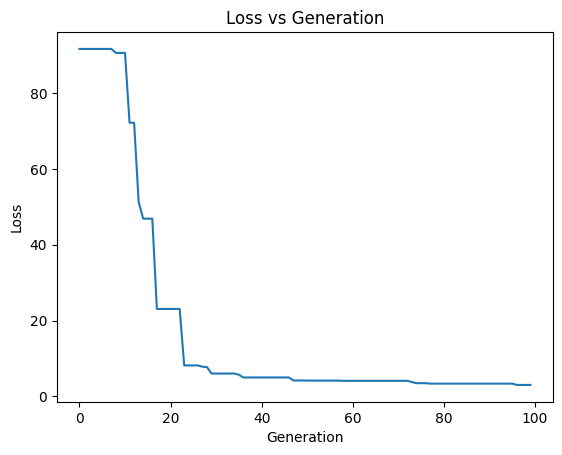

In [38]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):

  plt.plot(losses_list)
  plt.xlabel('Generation')
  plt.ylabel('Loss')
  plt.title('Loss vs Generation')
  plt.show()


losses_list = run_GA()
visualize_loss(losses_list)

[1.2713968910484263, 0.3137580383797278, -0.8919549766440049, 1.3459401237646595]


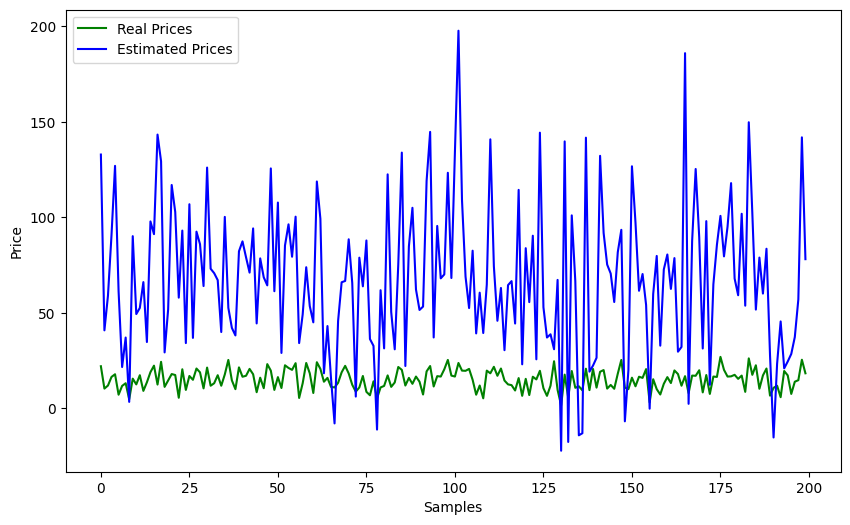

In [39]:
def visualize_predict_gt():
  # visualization of ground truth and predict value
  sorted_population = sorted(population, key=compute_fitness)
  print(sorted_population[-1])
  theta = np.array(sorted_population[-1])

  estimated_prices = []
  for feature in features_X:
      estimated_price = sum(c*x for x, c in zip(feature, theta))
      estimated_prices.append(estimated_price)
  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xlabel('Samples')
  plt.ylabel('Price')
  plt.plot(sales_Y, c='green', label='Real Prices')
  plt.plot(estimated_prices, c='blue', label='Estimated Prices')
  plt.legend()
  plt.show()

visualize_predict_gt()

[1.2713968910484263, 0.3137580383797278, -0.8919549766440049, 1.3459401237646595]


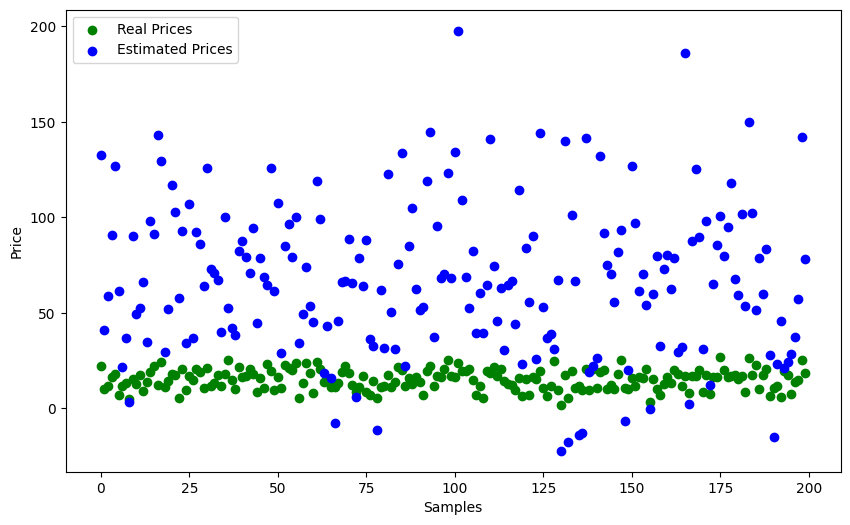

In [40]:
# visualization of ground truth and predict value
sorted_population = sorted(population, key=compute_fitness)
print(sorted_population[-1])
theta = np.array(sorted_population[-1])

estimated_prices = []
samples = [i for i in range(len(features_X))]
for feature in features_X:
    estimated_price = sum(c*x for x, c in zip(feature, theta))
    estimated_prices.append(estimated_price)
fig, ax = plt.subplots(figsize=(10, 6))
# plt.plot(prices, c='green')
# plt.plot(estimated_prices, c='red')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.scatter(samples, sales_Y, c='green', label='Real Prices')
plt.scatter(samples, estimated_prices, c='blue', label='Estimated Prices')
plt.legend()
plt.show()